In [1]:
import spacy
import networkx as nx

In [2]:
nlp = spacy.load("en")

In [55]:
doc = nlp(u"Indomethacin activates ENTITY2 and antagonizes the effect of the specific ENTITY1 anhydrase inhibitor acetazolamide , by a direct mechanism of action .")

doc1 = nlp(u'CHEMICAL activates ENTITY2 and antagonizes the effect of the specific ENTITY1 GENE inhibitor CHEMICAL , by a direct mechanism of action .')

In [40]:
g = nx.Graph()

In [41]:
for token in doc:
    if token.dep_ == "ROOT":
        root = token


In [57]:
doc1[2].norm_

u'ENTITY2'

In [58]:
import pickle

In [ ]:
pickle.dump()

In [42]:
root.i

1

In [43]:
root.norm_

u'activates'

In [27]:
#original code 

c = 0
def childIterator(root, level = 0, parent = ""):
    global c
    print " " * level, root, "-", parent
    c+= 1
    if parent:
        g.add_edge(parent.norm_, root.norm_)
    for child in root.children:
        childIterator(child, level + 1, root)

    return root

In [50]:
root.norm_

u'activates'

In [44]:
#TODO: replace tokens with indices

c = 0
def childIterator(root, level = 0, parent = None):
    
    global c
    print "\t" * level, root, "-", parent
    if parent:
        print "\t" * level, root.i, "-", parent.i
    c+= 1
    
    
    if parent:
        g.add_edge(parent.i, root.i)
    for child in root.children:
        childIterator(child, level + 1, root)

    return root

In [45]:
childIterator(root)

 activates - None
	CHEMICAL - activates
	0 - 1
	ENTITY2 - activates
	2 - 1
	and - activates
	3 - 1
	antagonizes - activates
	4 - 1
		effect - antagonizes
		6 - 4
			the - effect
			5 - 6
			of - effect
			7 - 6
				CHEMICAL - of
				13 - 7
					the - CHEMICAL
					8 - 13
					specific - CHEMICAL
					9 - 13
					ENTITY1 - CHEMICAL
					10 - 13
					GENE - CHEMICAL
					11 - 13
					inhibitor - CHEMICAL
					12 - 13
					, - CHEMICAL
					14 - 13
					by - CHEMICAL
					15 - 13
						mechanism - by
						18 - 15
							a - mechanism
							16 - 18
							direct - mechanism
							17 - 18
							of - mechanism
							19 - 18
								action - of
								20 - 19
	. - activates
	21 - 1


activates

In [14]:
# w OLD code - comparison:
# childIterator(root)

 activates - 
	Indomethacin - activates
	ENTITY2 - activates
	and - activates
	antagonizes - activates
		effect - antagonizes
			the - effect
			of - effect
				acetazolamide - of
					the - acetazolamide
					specific - acetazolamide
					ENTITY1 - acetazolamide
					anhydrase - acetazolamide
					inhibitor - acetazolamide
					, - acetazolamide
					by - acetazolamide
						mechanism - by
							a - mechanism
							direct - mechanism
							of - mechanism
								action - of
	. - activates


activates

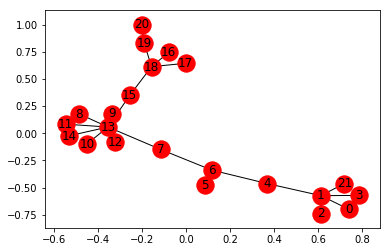

In [46]:
nx.draw_networkx(g)

In [47]:
nx.shortest_path_length(g, 2, 10)

6

In [18]:
nx.shortest_path_length(g, "ENTITY1", "ENTITY2")

6

In [49]:
for i in nx.shortest_path(g)[2][10]:
    print doc[i]

ENTITY2
activates
antagonizes
effect
of
CHEMICAL
ENTITY1


In [23]:
nx.shortest_path(g)['ENTITY1']['ENTITY2']

[u'ENTITY1',
 u'acetazolamide',
 u'of',
 u'effect',
 u'antagonizes',
 u'activates',
 u'ENTITY2']

In [21]:
g.nodes

NodeView((u'and', u'a', u'antagonizes', u'inhibitor', u'direct', u'by', u'mechanism', u'of', u'effect', u'ENTITY2', u'ENTITY1', u'specific', u'.', u',', u'acetazolamide', u'anhydrase', u'action', u'the', u'activates', u'Indomethacin'))